In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras.backend as K
import random
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from stepwise_regression import step_reg
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df_bp = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_bp.xlsx')
df_nup = pd.read_excel('F:\DATA SCIENCE\ДАТАСЕТы\ВКР (базовая)/X_nup.xlsx')

In [3]:
df = pd.merge(df_bp, df_nup, how='inner', on='Unnamed: 0')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.index.rename('index', inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
index,,,,,,,,,,,,,
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [5]:
df.describe(include='all').round(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0,1023.0
mean,2.9,1975.7,739.9,110.6,22.2,285.9,482.7,73.3,2466.9,218.4,44.3,6.9,57.2
std,0.9,73.7,330.2,28.3,2.4,40.9,281.3,3.1,485.6,59.7,45.0,2.6,12.4
min,0.4,1731.8,2.4,17.7,14.3,100.0,0.6,64.1,1036.9,33.8,0.0,0.0,0.0
25%,2.3,1924.2,500.0,92.4,20.6,259.1,266.8,71.2,2135.9,179.6,0.0,5.1,49.8
50%,2.9,1977.6,739.7,110.6,22.2,285.9,451.9,73.3,2459.5,219.2,0.0,6.9,57.3
75%,3.6,2021.4,961.8,129.7,24.0,313.0,693.2,75.4,2767.2,257.5,90.0,8.6,64.9
max,5.6,2207.8,1911.5,199.0,33.0,413.3,1399.5,82.7,3848.4,414.6,90.0,14.4,104.0


### Рассматривается соотношение "матрица - наполнитель"

1 Переименование целевой переменной

In [6]:
df['y_3'] = df['Соотношение матрица-наполнитель']
df = df.drop(columns=['Соотношение матрица-наполнитель'])

2 Фильтрация шума с помощью маски (ядра) на основе исходного датасета (первые 23 строки)

In [7]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
cols = [col for col in df.columns if col != 'y_W']
df[cols] = sc.fit_transform(df[cols])

main_y = df.loc[:22, 'y_3']
other_y = df.loc[23:, 'y_3']
selected_rows = pd.DataFrame(columns=df.columns)

# Отбираем по knn ближайших соседей для каждого наблюдения исходного датасета - первых 23 строк 
knn = 3
for y in main_y:
    distances = euclidean_distances(df.iloc[23:], df.iloc[:23].loc[df['y_3'] == y])
    indices = np.argsort(distances, axis=0)[:knn]
    selected_rows = selected_rows.append(df.iloc[indices.flatten() + 23])
    
df = pd.concat([df.loc[:22], selected_rows]).drop_duplicates()

# Второй вариант кода фильтрации шума 
# selected_rows = []

# for x in range(23):
#     distances = euclidean_distances(df.iloc[x:x+1, :], df.iloc[23:, :]).flatten()
#     selected_rows.extend(list(distances.argsort()[:3] + 23))

# df = df.loc[list(range(23)) + selected_rows].drop_duplicates()

df[cols] = sc.inverse_transform(df[cols])

print(df.shape)
df.sort_index()

(76, 13)


,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,y_3
0,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000,1.857143
1,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000,1.857143
2,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000,1.857143
3,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000,1.857143
4,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000,2.771331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2029.296906,993.859728,74.690667,27.292550,226.555876,547.516759,71.680994,2528.082238,220.732220,90.0,0.037639,59.156843,2.807028
964,1993.544328,402.032452,131.532947,25.275127,338.463813,819.961314,74.977723,2120.968913,311.066777,90.0,7.410758,50.568878,2.695937
991,1992.644115,661.574467,114.162319,23.091374,273.535419,833.694774,73.623395,2518.310162,187.671301,90.0,3.608573,46.009743,1.951224
1004,2038.289409,767.897075,83.191553,25.627620,249.612303,774.578473,71.279418,2768.839085,266.956745,90.0,2.751101,63.681745,1.580433


In [8]:
print(df.index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 322, 267, 343, 75, 819, 861, 936, 283, 442, 1004, 159, 305, 365, 253, 490, 248, 28, 358, 849, 130, 234, 418, 207, 733, 389, 364, 461, 452, 519, 247, 336, 235, 324, 224, 61, 757, 824, 178, 192, 964, 675, 710, 583, 301, 991, 694, 239, 498, 669, 587, 1007, 912, 409]


3 EDA

3.1 Визуализация данных

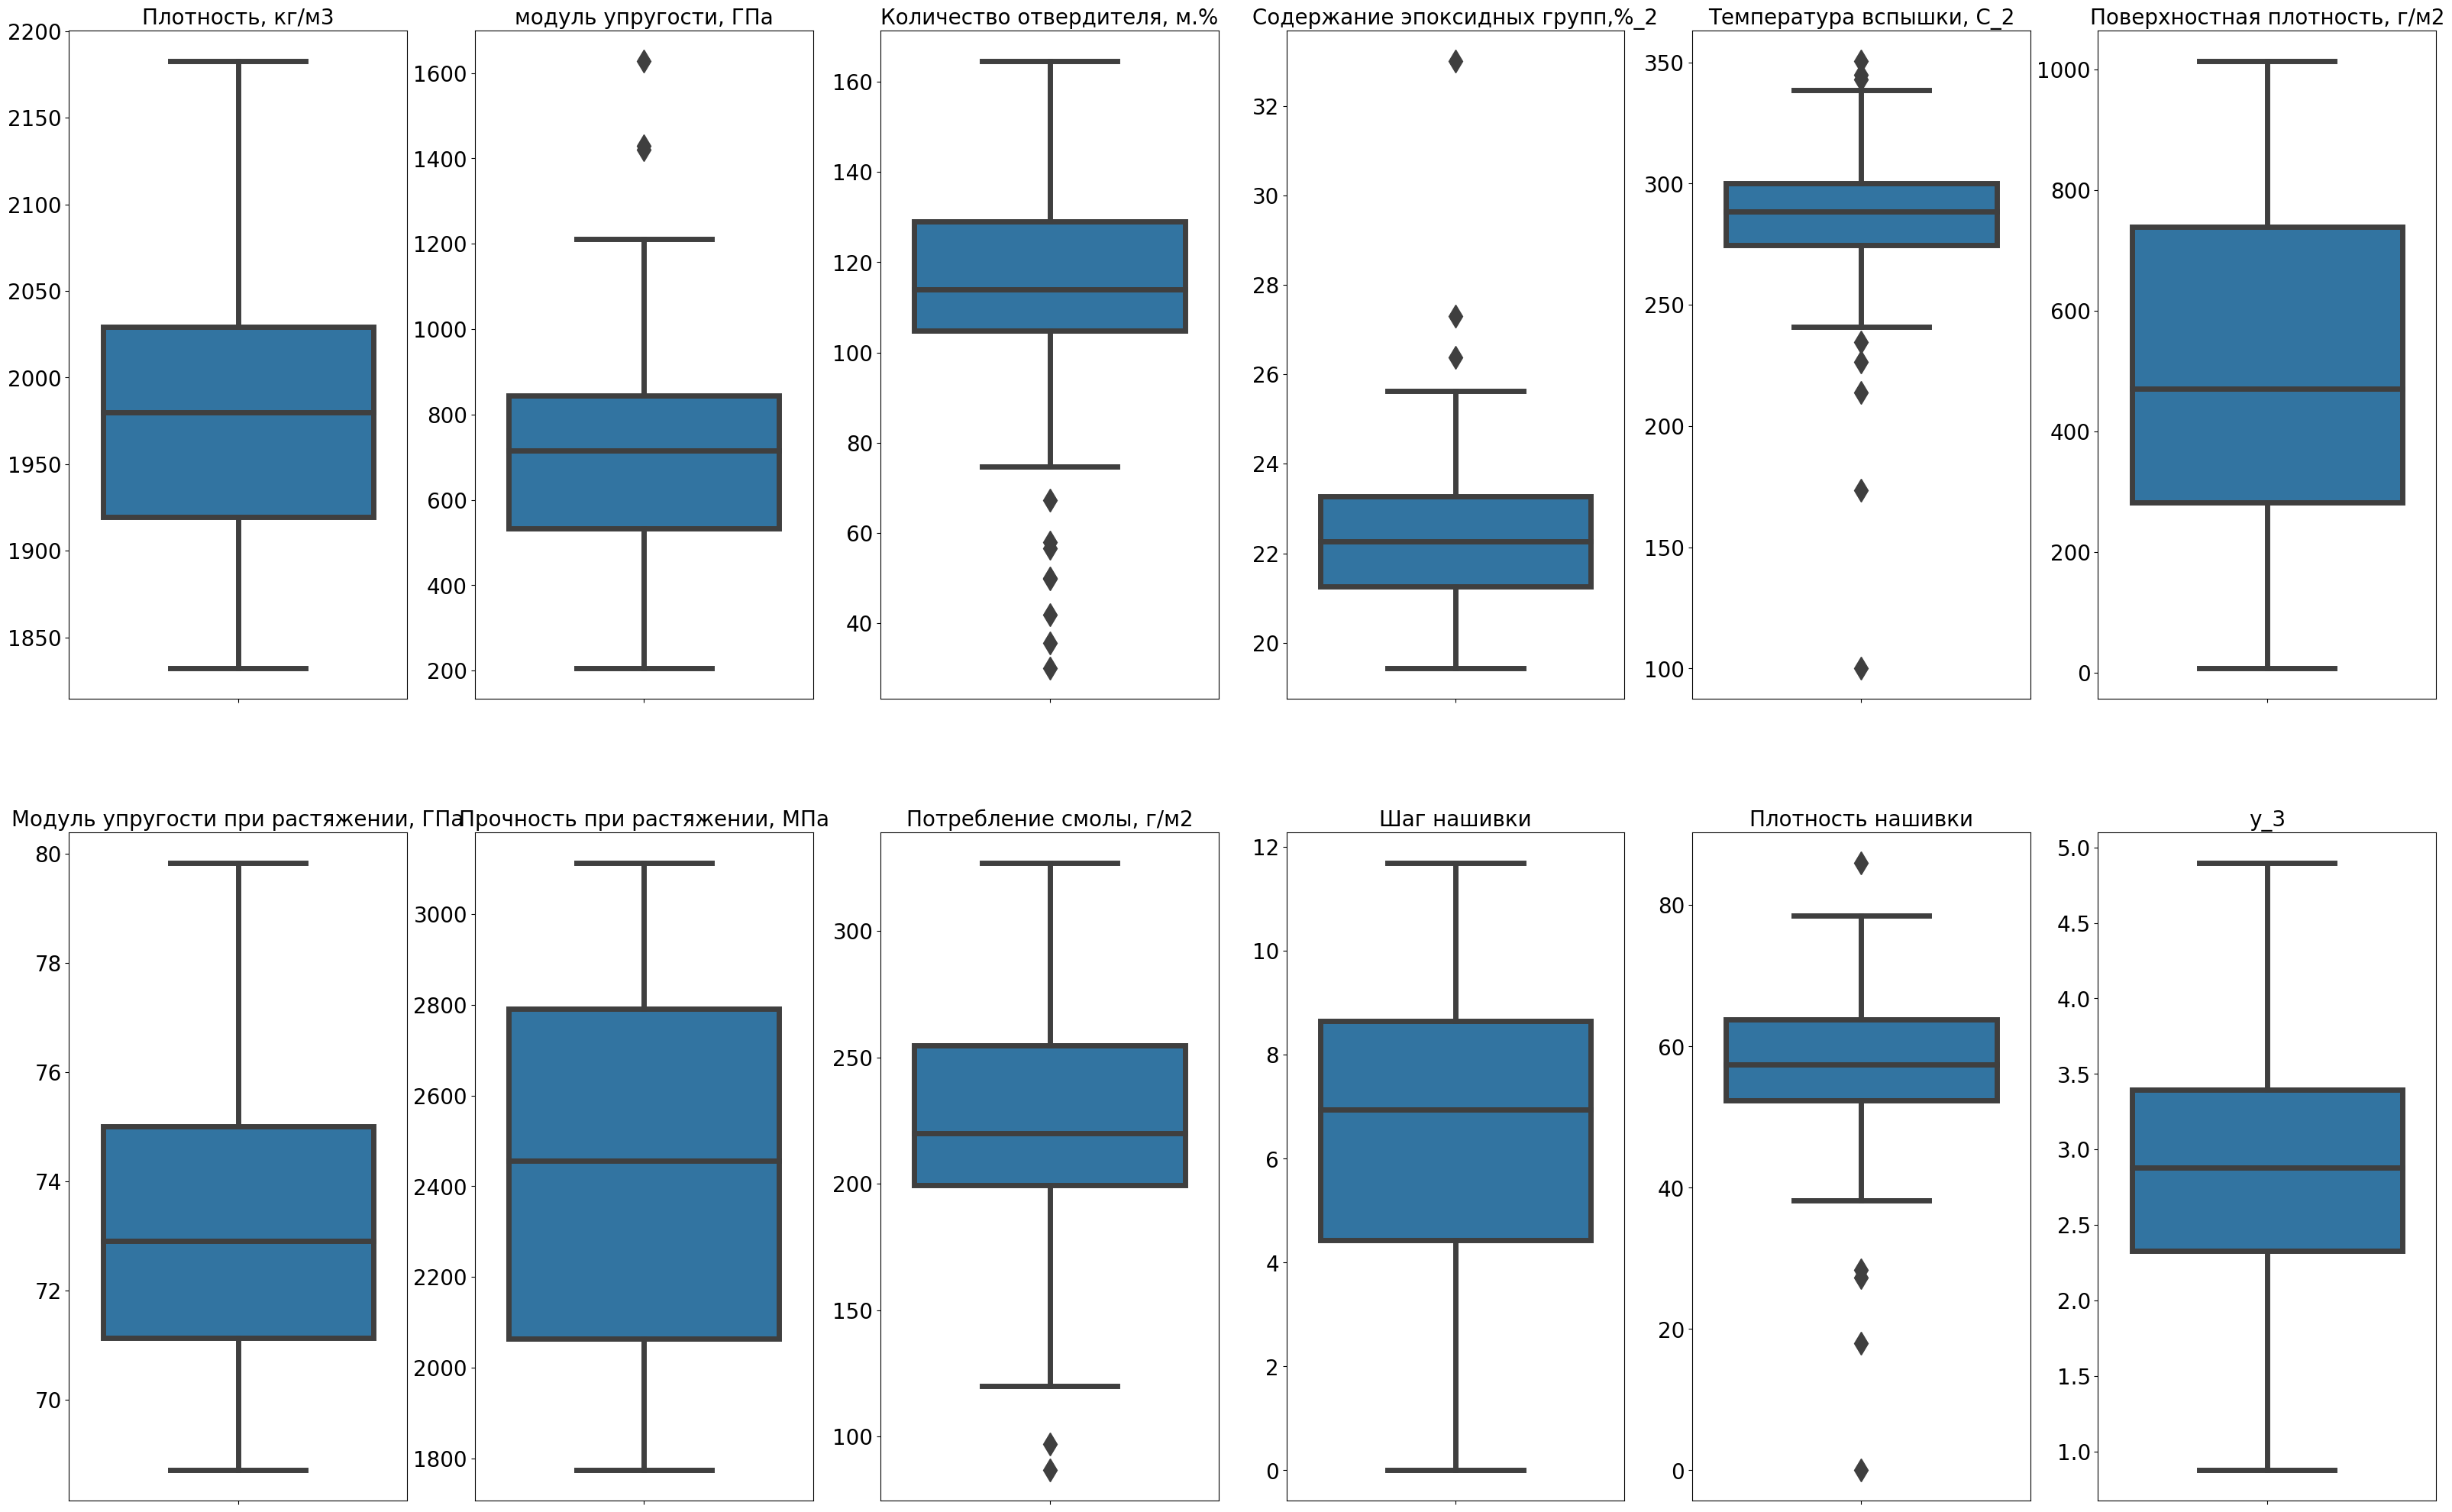

In [9]:
plt.figure(figsize=(40, 25))

for i, col in enumerate(df.drop('Угол нашивки, град', axis=1), start=1):
    plt.subplot(2, 6, i)
    sns.boxplot(data=df, y=col, fliersize=15, linewidth=5)
    # plt.setp(plt.gca().get_xticklabels(), fontsize=8)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)
    plt.title(col, size=20)
    plt.ylabel(None)

In [10]:
# sns.pairplot(df, kind="reg")    # hue = 'Угол нашивки, град',
# plt.show()

3.2 Приведение к нормальному распределению (методом Йео-Джонсона)

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
columns_to_transform = df.columns.difference(['y_3', 'Угол нашивки, град'])
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

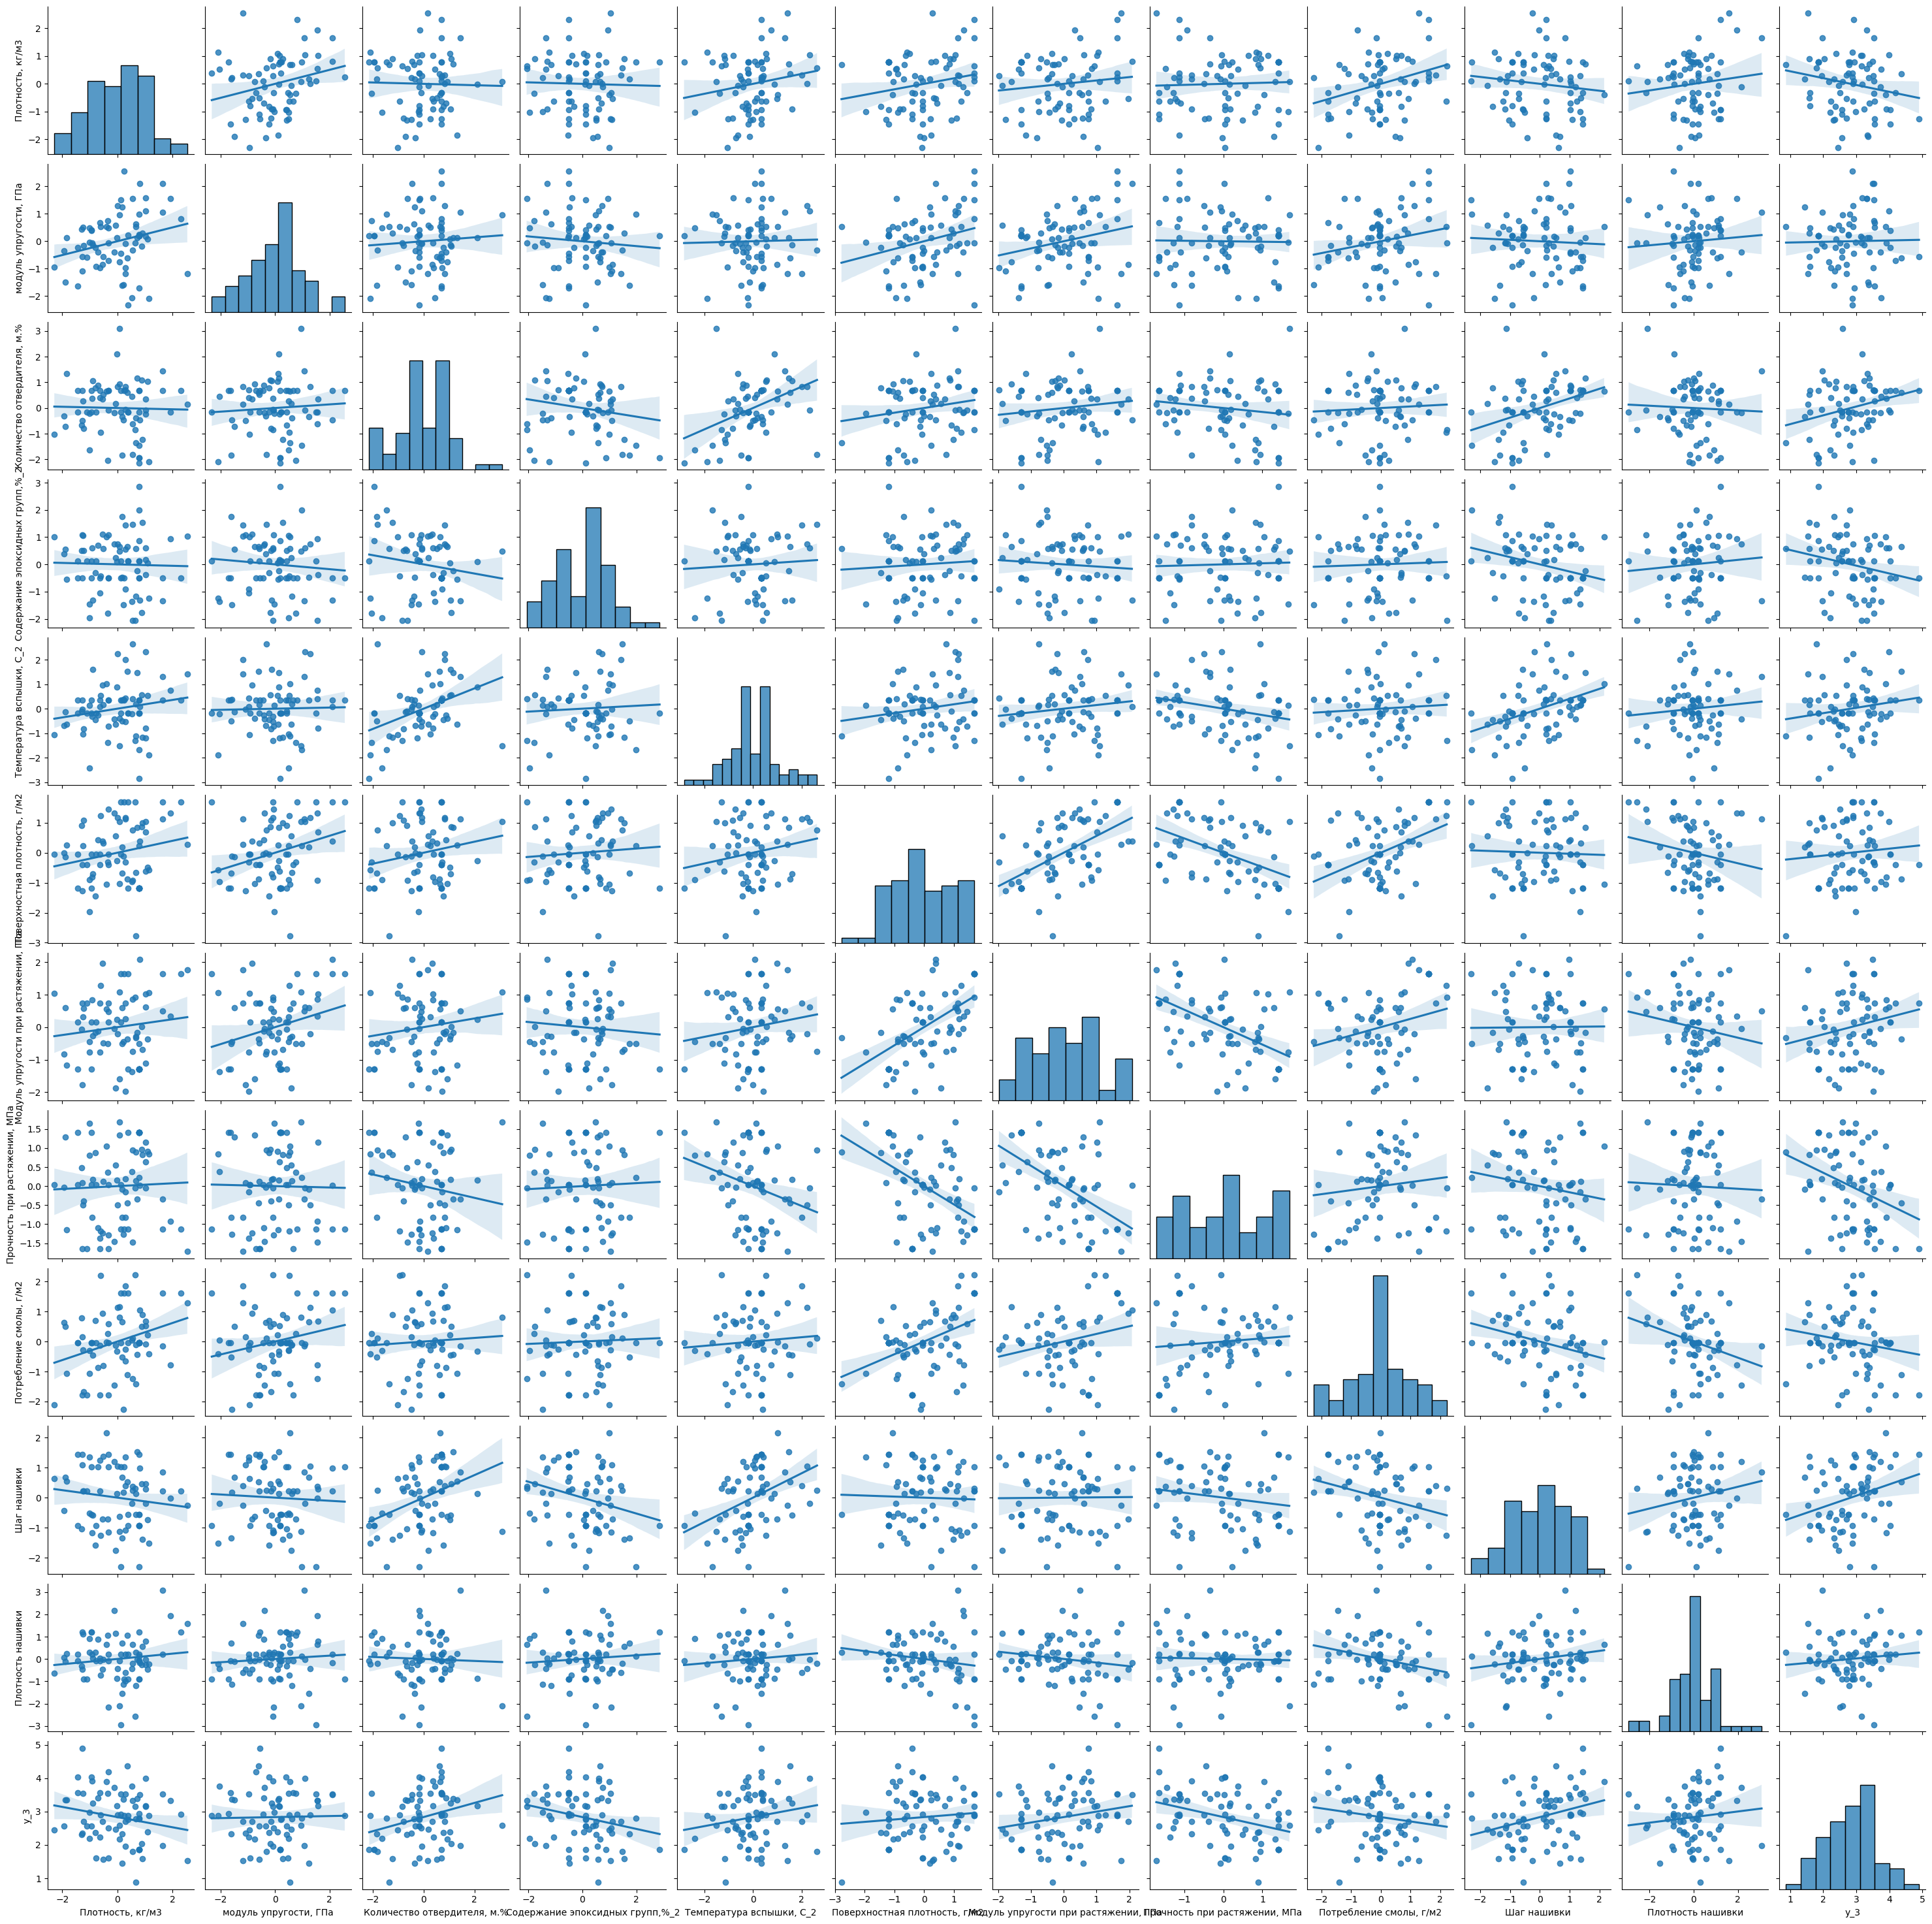

In [12]:
sns.pairplot(df.drop('Угол нашивки, град', axis=1), kind="reg")    # hue = 'Угол нашивки, град',
plt.show()

4 Отбор признаков

In [13]:
x_0 = 'Соотношение матрица-наполнитель'
x_1 = 'Плотность, кг/м3'
x_2 = 'модуль упругости, ГПа'
x_3 = 'Количество отвердителя, м.%'
x_4 = 'Содержание эпоксидных групп,%_2'
x_5 = 'Температура вспышки, С_2'
x_6 = 'Поверхностная плотность, г/м2'
x_7 = 'Модуль упругости при растяжении, ГПа'
x_8 = 'Прочность при растяжении, МПа'
x_9 = 'Потребление смолы, г/м2'
x_10 = 'Угол нашивки, град'
x_11 = 'Шаг нашивки'
x_12 = 'Плотность нашивки'

4.1 Корреляционные матрицы

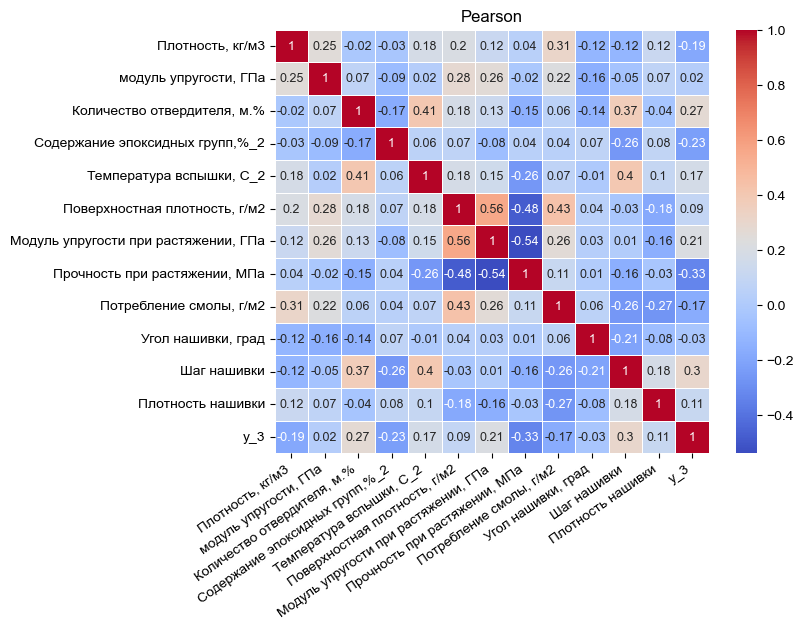

In [14]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

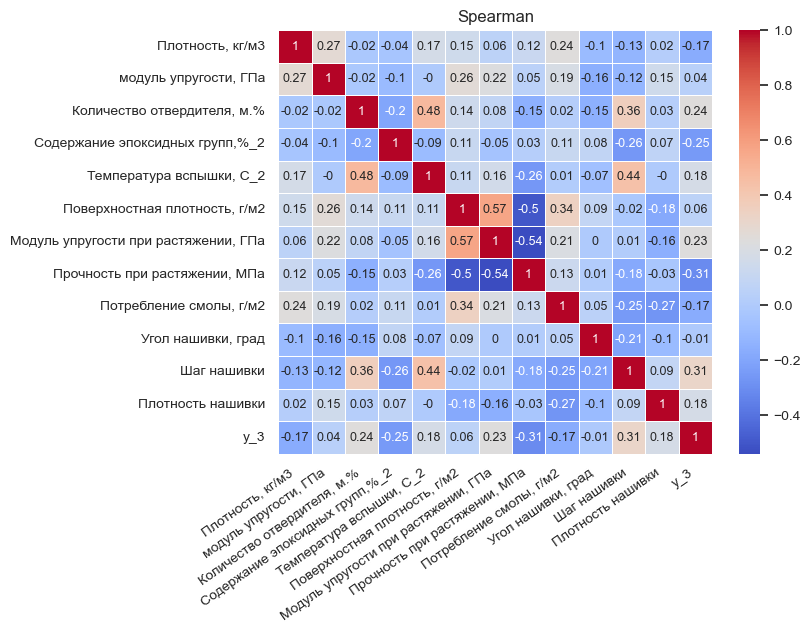

In [15]:
matrix = np.triu(df.corr())
plt.figure(figsize=(7, 5.5))
sns.heatmap(df.corr(method='spearman').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Spearman')
plt.show()

4.2 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [16]:
corr_matrix_p = df.corr(method='pearson')
corr_matrix_s = df.corr(method='spearman')
# коэффициенты корреляции между y и x
corr_yx_p = corr_matrix_p['y_3'][:-1]
corr_yx_s = corr_matrix_s['y_3'][:-1]
# коэффициенты парной корреляции между x
corr_x_p = np.delete(np.array(corr_matrix_p), -1, axis=0)[:, :-1]
corr_x_s = np.delete(np.array(corr_matrix_s), -1, axis=0)[:, :-1]

det_r_yx_p = np.linalg.det(corr_matrix_p)
det_r_x_p = np.linalg.det(corr_matrix_p.iloc[:-1, :-1])
R2_P = 1 - det_r_yx_p / det_r_x_p

det_r_yx_s = np.linalg.det(corr_matrix_s)
det_r_x_s = np.linalg.det(corr_matrix_s.iloc[:-1, :-1])
R2_S = 1 - det_r_yx_s / det_r_x_s
print()
print(f"Прогноз коэф. детерминации R2 Pearson:  {R2_P.round(3)}")
print(f"Прогноз коэф. детерминации R2 Spearman: {R2_S.round(3)}")


Прогноз коэф. детерминации R2 Pearson:  0.265
Прогноз коэф. детерминации R2 Spearman: 0.28


In [17]:
X_3 = df.copy()
y_3 = X_3.pop('y_3')

4.3 Анализ значимости признаков

MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [18]:
mi_full = mutual_info_regression(X_3, y_3, random_state=2023)
f_full = f_regression(X_3, y_3)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X_3.corrwith(y_3), 'f':f_full[0], 'p':f_full[1]}, index=X_3.columns)
f_p_full.round(3)

,MI,corr,f,p
"Плотность, кг/м3",0.036,-0.194,2.889,0.093
"модуль упругости, ГПа",0.163,0.020,0.028,0.867
"Количество отвердителя, м.%",0.151,0.270,5.803,0.018
"Содержание эпоксидных групп,%_2",0.000,-0.226,3.968,0.050
"Температура вспышки, С_2",0.000,0.172,2.265,0.137
"Поверхностная плотность, г/м2",0.191,0.092,0.626,0.431
"Модуль упругости при растяжении, ГПа",0.000,0.208,3.331,0.072
"Прочность при растяжении, МПа",0.132,-0.332,9.150,0.003
"Потребление смолы, г/м2",0.226,-0.166,2.096,0.152
"Угол нашивки, град",0.086,-0.030,0.068,0.794


4.4 Анализ мультиколлинеарности признаков

In [19]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df, features = df.columns)

,VIF,Tolerance
"Плотность, кг/м3",1.397585,0.715520
"модуль упругости, ГПа",1.283223,0.779288
"Количество отвердителя, м.%",1.434220,0.697243
"Содержание эпоксидных групп,%_2",1.282894,0.779488
"Температура вспышки, С_2",1.652557,0.605123
"Поверхностная плотность, г/м2",2.189580,0.456709
"Модуль упругости при растяжении, ГПа",1.892563,0.528384
"Прочность при растяжении, МПа",2.094244,0.477499
"Потребление смолы, г/м2",1.732054,0.577349
"Угол нашивки, град",1.140998,0.876426


4.5 Пошаговый отбор признаков (stepwise regression)

In [20]:
backselect = step_reg.backward_regression(X_3, y_3, 0.05, verbose=False)
forwardselect = step_reg.forward_regression(X_3, y_3, 0.05, verbose=False)
print(backselect)
print(forwardselect)

['Количество отвердителя, м.%', 'Прочность при растяжении, МПа']
['Прочность при растяжении, МПа', 'Шаг нашивки']


#### В результате пошагового отбора рассматриваем следующие признаки:

In [21]:
df = df.loc[:, [x_1, x_3, x_4, x_5, x_7, x_8, x_9, x_11, x_12, 'y_3']]

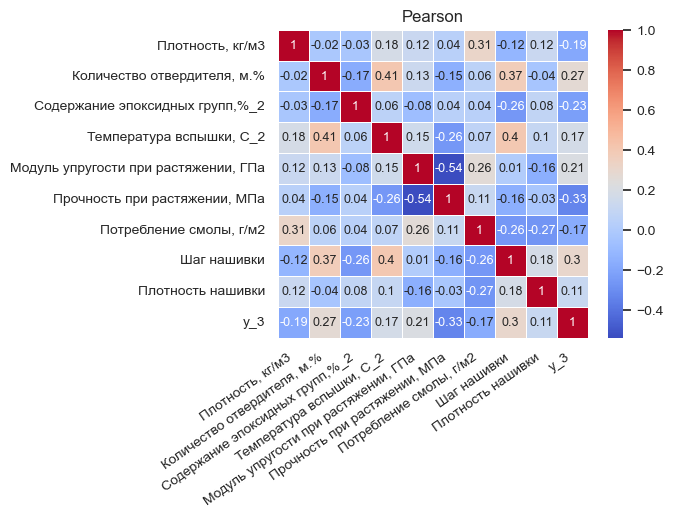

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5 Разделение датасета на train и test, масштабирование

In [23]:
X_3 = df.drop(['y_3'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_3, # X_poly - если использовать полиномиальную регрессию
                                                    y_3,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(53, 9)
(23, 9)


In [25]:
sc = RobustScaler()    # MinMaxScaler()    RobustScaler()    StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.transform(X_test)

6 Вычисление (прогноз) коэффициента детерминации по коэф. корреляции Пирсона:  $R^2 = 1 - \frac{detA^+}{detA}$

In [26]:
df_train = pd.DataFrame(data=X_train_std, columns=X_3.columns)
df_train['y_3'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(data=X_test_std, columns=X_3.columns)
df_test['y_3'] = y_test.reset_index(drop=True)

corr_matrix_train = df_train.corr(method='pearson')
corr_matrix_test = df_test.corr(method='pearson')

corr_yx_train = corr_matrix_train['y_3'][:-1]    # коэффициенты корреляции между y и x
corr_yx_test = corr_matrix_test['y_3'][:-1]    # коэффициенты корреляции между y и x

corr_x_train = np.delete(np.array(corr_matrix_train), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x
corr_x_test = np.delete(np.array(corr_matrix_test), -1, axis=0)[:, :-1]    # коэффициенты парной корреляции между x

det_r_yx_train = np.linalg.det(corr_matrix_train)
det_r_x_train = np.linalg.det(corr_matrix_train.iloc[:-1, :-1])
R2_train = 1 - det_r_yx_train / det_r_x_train
det_r_yx_test = np.linalg.det(corr_matrix_test)
det_r_x_test = np.linalg.det(corr_matrix_test.iloc[:-1, :-1])
R2_test = 1 - det_r_yx_test / det_r_x_test
print(f"Оценка R2 для full-выборки:  {R2_P.round(3)}")
print(f"Оценка R2 для train-выборки: {R2_train.round(3)}")
print(f"Оценка R2 для test-выборки:  {R2_test.round(3)}")

Оценка R2 для full-выборки:  0.265
Оценка R2 для train-выборки: 0.242
Оценка R2 для test-выборки:  0.482


#### 7 Обучение моделей

In [27]:
# Определение функции коэффициента детерминации R2
def r_squared(y_true, y_pred):
    SS_res =  np.sum(np.square(y_true - y_pred))
    SS_tot = np.sum(np.square(y_true - np.mean(y_true)))
    return 1 - (SS_res / SS_tot)

# Задание диапазона значений для seed_value
seed_values = range(51, 61)

# Инициализация переменных для сохранения лучшей модели
best_seed = 0
best_r2 = -np.inf
best_model = None

# Цикл обучения моделей с разными seed_value
for seed_value in seed_values:
    
    # Установка seed_value для генератора случайных чисел
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

    model = Sequential([
        Dense(8, activation='relu', input_shape=(X_train_std.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train_std, y_train, epochs=200, validation_split=0.2, callbacks=[early_stop], verbose=0)

    y_pred = model.predict(X_test_std)
    r2 = r_squared(np.ravel(y_test), np.ravel(y_pred))

    if r2 > best_r2:
        best_r2 = r2
        best_seed = seed_value
        best_model = model
        best_history = history

1/1 [==============================] - 0s 78ms/step


In [28]:
print('Лучшее значение коэффициента детерминации R2:', best_r2.round(3))
print('Значение seed для лучшей модели:', best_seed)
print('Параметры лучшей модели:', best_model)
best_model.summary()

Лучшее значение коэффициента детерминации R2: 0.227
Значение seed для лучшей модели: 58
Параметры лучшей модели: <keras.engine.sequential.Sequential object at 0x0000021BF7690130>
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 80        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


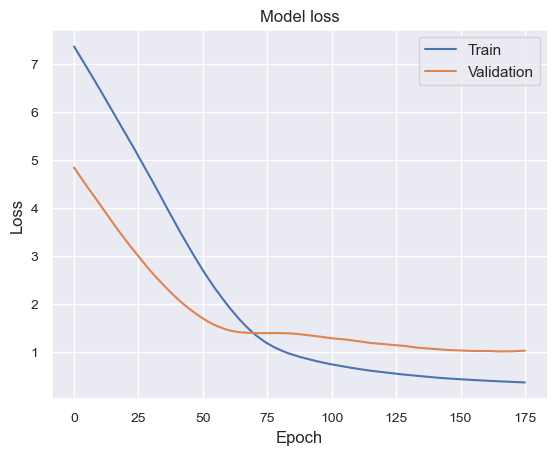

In [29]:
# Построение графика loss для лучшей модели
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
# plt.ylim([0., 1])
plt.show()

In [30]:
y_pred = best_model.predict(X_test_std)
y_pred_train = best_model.predict(X_train_std)
print(f'MSE Train: {mean_squared_error(y_train, y_pred_train)}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred)}')
print()
print(f'RMSE Train: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print()
print(f'MAE Train: {mean_absolute_error(y_train, y_pred_train)}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred)}')
print()
print(f'R2 Train: {r2_score(y_train, y_pred_train)}')
print(f'R2 Test: {r2_score(y_test, y_pred)}')

2/2 [==============================] - 0s 3ms/step
MSE Train: 0.4946234959911954
MSE Test: 0.594639760951487

RMSE Train: 0.7032947433268611
RMSE Test: 0.7711288873797213

MAE Train: 0.5672253384786274
MAE Test: 0.6340926666506752

R2 Train: 0.10183090206255352
R2 Test: 0.22652036491651162


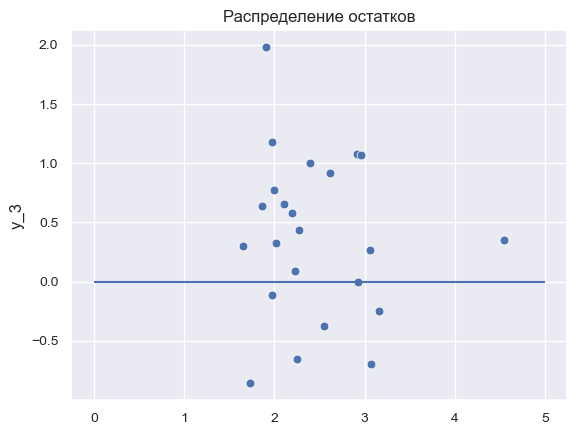

In [31]:
sns.scatterplot(x = y_pred[:, 0], y = y_test - y_pred[:, 0], s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 5)
plt.title('Распределение остатков')
plt.show()

9. Доверительный интервал для предсказаний лучшей модели

In [32]:
y_pred = y_pred[:, 0]

In [33]:
n = len(y_test)
p = len(X_test_std[0])
se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p))

# Уровень доверия
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, n - p)

lower = y_pred - t_value * se
upper = y_pred + t_value * se

y_test = y_test.values
print("Доверительный интервал для прогноза:")
print(f"Нижняя граница:  {lower[:12].round(2)}")
print(f"y_test:          {y_test[:12].round(2)}")
print(f"y_pred:          {y_pred[:12].round(2)}")
print(f"Верхняя граница: {upper[:12].round(2)}")
print()
print(f"Разброс тестовых значений:       {y_test.min().round(2)}; {y_test.max().round(2)}")
print(f"Разброс предсказанных значений:  {y_pred.min().round(2)}; {y_pred.max().round(2)}")
print()
print(f"Наименьшая нижняя граница доверительного интервала:  {lower.min().round(2)}")
print(f"Набольшая верхняя граница доверительного интервала:  {upper.max().round(2)}")

Доверительный интервал для прогноза:
Нижняя граница:  [-0.13  0.95  0.81 -0.15 -0.1  -0.25  0.11  0.27  0.8  -0.39 -0.47 -0.22]
y_test:          [2.77 2.38 2.92 1.86 2.34 2.5  2.32 3.39 4.   0.88 1.95 3.89]
y_pred:          [1.99 3.07 2.93 1.97 2.02 1.87 2.23 2.39 2.92 1.73 1.65 1.9 ]
Верхняя граница: [4.11 5.19 5.05 4.09 4.14 3.99 4.35 4.51 5.04 3.85 3.77 4.02]

Разброс тестовых значений:       0.88; 4.9
Разброс предсказанных значений:  1.649999976158142; 4.550000190734863

Наименьшая нижняя граница доверительного интервала:  -0.4699999988079071
Набольшая верхняя граница доверительного интервала:  6.670000076293945


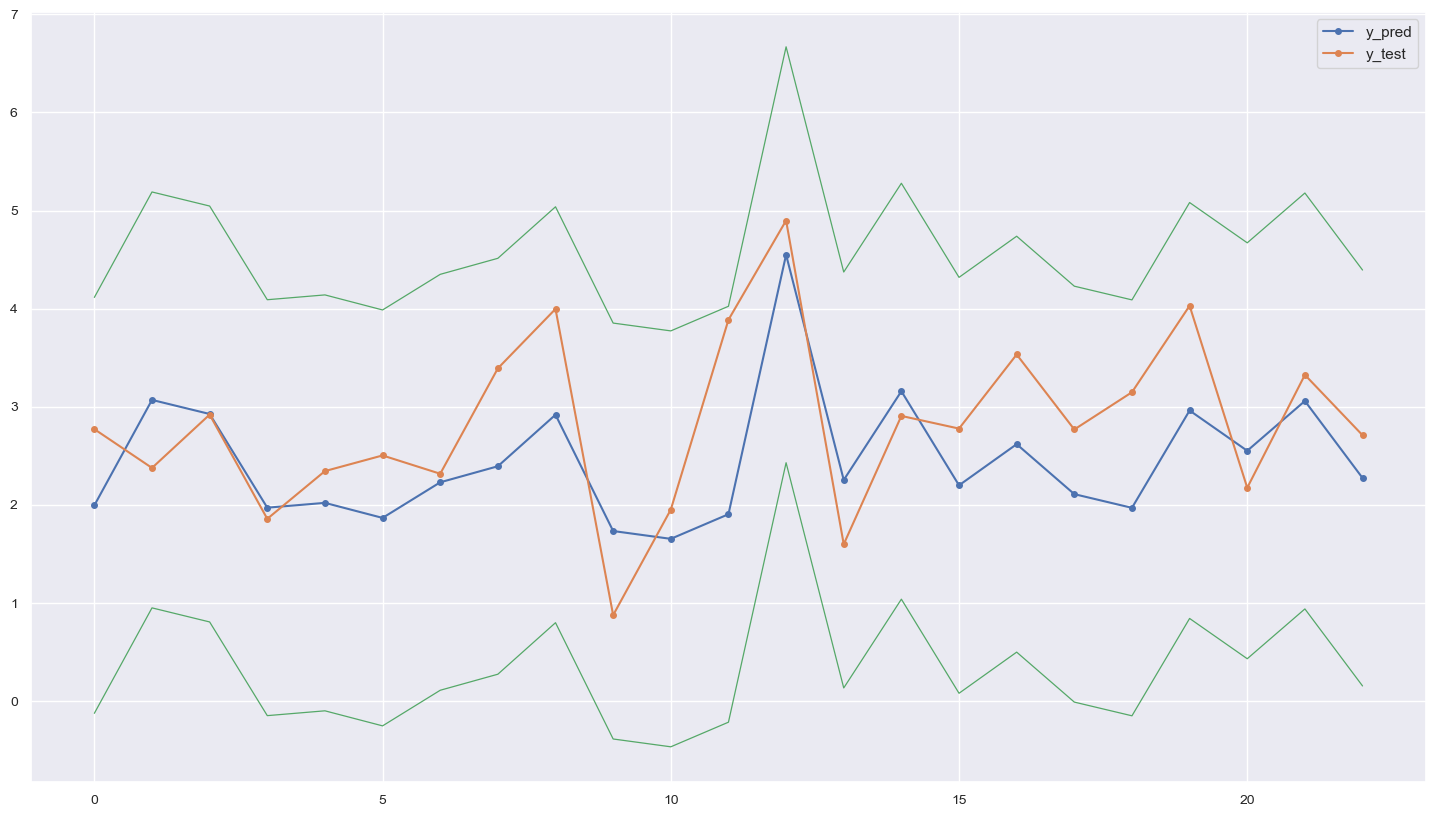

In [34]:
plt.figure(figsize=(18, 10))
plt.plot(y_pred, label='y_pred', marker='o', markersize=4)
plt.plot(y_test, label='y_test', marker='o', markersize=4)
plt.plot(lower, linewidth = 0.9, color='g')
plt.plot(upper, linewidth = 0.9, color='g')
plt.legend()
plt.grid(True)
plt.show()